# First Attempt
batch size 256 lr 1e-3

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using Theano backend.
/home/giles/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Options

In [2]:
classTrainFeatures = basic_features
classModel = 'modelSwish'
varSet = "basic_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 10000
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'PRI_tau_pt', 'DER_deltar_tau_lep', 'PRI_jet_leading_eta', 'PRI_lep_eta', 'PRI_tau_eta', 'DER_lep_eta_centrality', 'DER_mass_jet_jet', 'DER_deltaeta_jet_jet', 'DER_pt_tot', 'DER_met_phi_centrality', 'PRI_jet_num', 'PRI_met', 'DER_pt_h', 'DER_pt_ratio_lep_tau', 'DER_sum_pt', 'PRI_jet_leading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_all_pt', 'PRI_met_sumet', 'DER_prodeta_jet_jet', 'PRI_lep_pt', 'PRI_jet_subleading_pt', 'PRI_met_phi', 'PRI_jet_leading_phi', 'PRI_lep_phi', 'PRI_jet_subleading_phi', 'PRI_tau_phi']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 7.015s 


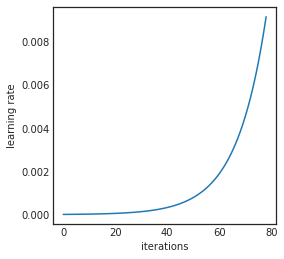

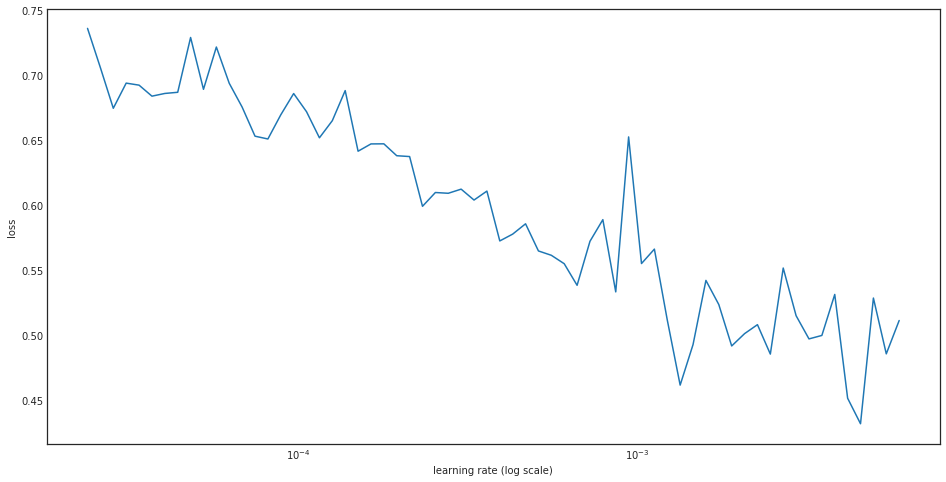

______________________________________



In [4]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=False, verbose=0)

In [4]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Running fold 1 / 10
2 classes found, running in binary mode

1 New best found: 0.477722981245
2 New best found: 0.425479322025
3 New best found: 0.416361851766
4 New best found: 0.404430264375
5 New best found: 0.397690167733
6 New best found: 0.390346106636
7 New best found: 0.389764624643
8 New best found: 0.387458669837
10 New best found: 0.38286427605
11 New best found: 0.381832220156
12 New best found: 0.375810327992
13 New best found: 0.37482418295
14 New best found: 0.37433891955
15 New best found: 0.373796481228
22 New best found: 0.373610033722
23 New best found: 0.369329546557
24 New best found: 0.369071914262
25 New best found: 0.367742270274
26 New best found: 0.366988180403
28 New best found: 0.366010698365
29 New best found: 0.365516089415
30 New best found: 0.365214297064
31 New best found: 0.365182626903
45 New best found: 0.364935105826
46 New best found: 0.364221013728
47 New best found: 0.363843842974
48 New best found: 0.362983148775
49 New be

19 New best found: 0.375083191895
21 New best found: 0.373939184546
22 New best found: 0.372143566549
25 New best found: 0.371586582458
26 New best found: 0.369651070404
27 New best found: 0.369433165717
28 New best found: 0.369278826916
29 New best found: 0.368565419674
30 New best found: 0.368266719818
31 New best found: 0.368230111861
45 New best found: 0.367573056936
48 New best found: 0.366835260713
49 New best found: 0.366043386793
52 New best found: 0.365365929699
53 New best found: 0.364540344429
56 New best found: 0.364437599277
57 New best found: 0.364148542595
58 New best found: 0.364112335026
60 New best found: 0.364064596367
61 New best found: 0.363954734063
62 New best found: 0.363932155061
63 New best found: 0.363923464632
Early stopping after 83 epochs
Score is: {'loss': 0.36392346463203429, 'AUC': 0.09401790415388489, 'wAUC': 0.072914924719845731}
Fold took 64.129s

Running fold 8 / 10
1 New best found: 0.470458434916
2 New best found: 0.422380054824
3 New best found: 

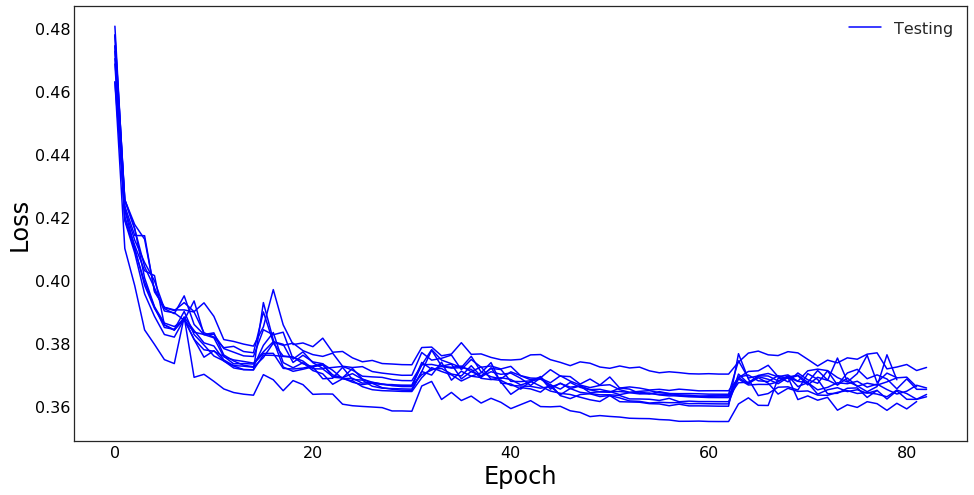

Mean wAUC = 0.0702 +- 0.0006
______________________________________



In [5]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=20, cosAnnealMult=2, trainOnWeights=False, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [6]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [7]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 5 with loss = 0.355260104227
Model 1 is 0 with loss = 0.360130424731
Model 2 is 4 with loss = 0.360855537844
Model 3 is 3 with loss = 0.361546852136
Model 4 is 1 with loss = 0.362862290981
Model 5 is 2 with loss = 0.363063051798
Model 6 is 7 with loss = 0.363329282781
Model 7 is 6 with loss = 0.363923464632
Model 8 is 8 with loss = 0.365004255203
Model 9 is 9 with loss = 0.370316339769


## Response on development data

In [8]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000180719316104s per sample

Predicting batch 2 out of 10
Prediction took 0.00014640698343s per sample

Predicting batch 3 out of 10
Prediction took 0.000150348036225s per sample

Predicting batch 4 out of 10
Prediction took 0.000159123897552s per sample

Predicting batch 5 out of 10
Prediction took 0.000154088652134s per sample

Predicting batch 6 out of 10
Prediction took 0.000152647197247s per sample

Predicting batch 7 out of 10
Prediction took 0.000153722643852s per sample

Predicting batch 8 out of 10
Prediction took 0.000148466726715s per sample

Predicting batch 9 out of 10
Prediction took 0.000153382674856s per sample

Predicting batch 10 out of 10
Prediction took 0.000150633630791s per sample



In [9]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.910624443416, weighted 0.932446674923


## Response on val data

In [10]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000151235628128s per sample

Predicting batch 2 out of 10
Prediction took 0.000149731588364s per sample

Predicting batch 3 out of 10
Prediction took 0.000148037195206s per sample

Predicting batch 4 out of 10
Prediction took 0.00014841504097s per sample

Predicting batch 5 out of 10
Prediction took 0.000156605768204s per sample

Predicting batch 6 out of 10
Prediction took 0.000148265981674s per sample

Predicting batch 7 out of 10
Prediction took 0.000148189020157s per sample

Predicting batch 8 out of 10
Prediction took 0.000148903417587s per sample

Predicting batch 9 out of 10
Prediction took 0.000148982000351s per sample

Predicting batch 10 out of 10
Prediction took 0.000147972393036s per sample



In [11]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.907750851845, weighted 0.92939084997


## Evaluation

### Import in dataframe

In [12]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [13]:
devData = convertToDF(trainData)
valData = convertToDF(valData)

200000 candidates loaded
50000 candidates loaded


In [14]:
sigVal = (valData.gen_target == 1)
bkgVal = (valData.gen_target == 0)

### MVA distributions

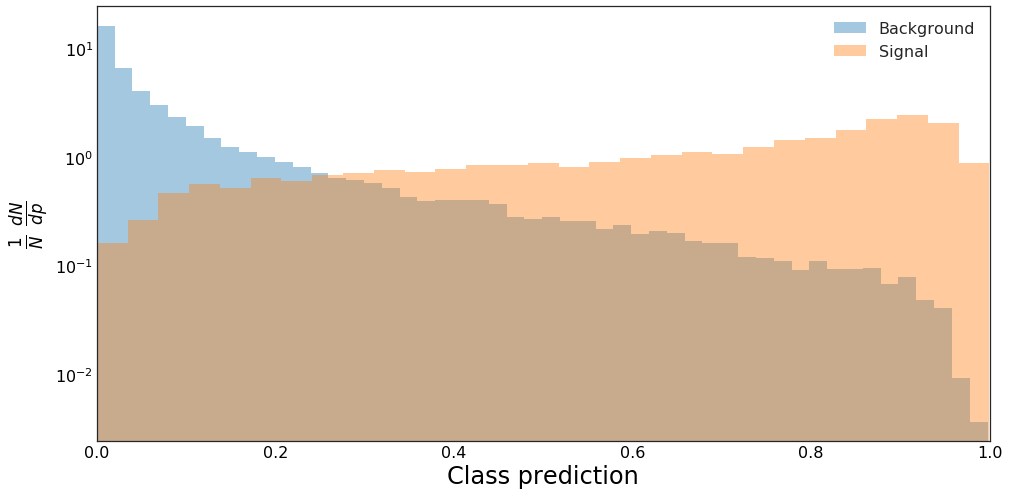

In [15]:
getClassPredPlot([valData[bkgVal], valData[sigVal]], weightName='gen_weight')

In [16]:
def AMS(s, b):
    """ Approximate Median Significance defined as:
        AMS = sqrt(
                2 { (s + b + b_r) log[1 + (s/(b+b_r))] - s}
              )        
    where b_r = 10, b = background, s = signal, log is natural logarithm """
    
    br = 10.0
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) -s)
    if radicand < 0:
        print 'radicand is negative. Exiting'
        exit()
    else:
        return math.sqrt(radicand)
    
def amsScan(inData, res=0.0001):
    best = [0,-1]
    for i in np.linspace(0.,1.,1./res):
        ams = AMS(np.sum(inData.loc[(inData['pred_class'] >= i) & sigVal, 'gen_weight']),
                  np.sum(inData.loc[(inData['pred_class'] >= i) & bkgVal, 'gen_weight']))
        if ams > best[1]:
            best = [i, ams]
    print best

In [17]:
amsScan(valData)

/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


[0.82258225822582265, 1.5926230941900177]


## Save classified data

In [ ]:
name = dirLoc + signal + "_" + channel + "_" + varSet + '_' + classModel + '_classifiedData.csv'
print "Saving data to", name
valData.to_csv(name, columns=['gen_target', 'gen_weight', 'gen_sample', 'pred_class'])

## Save/load

In [ ]:
name = "weights/DNN_" + signal + "_" + channel + "_" + varSet + '_' + classModel
print name

### Save

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

### Load

In [ ]:
ensemble, weights, compileArgs, inputPipe, outputPipe = loadEnsemble(name)